# Sigmoid

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/qa/docs/learn/layers/04-Sigmoid.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/qa/docs/learn/layers/04-Sigmoid.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](https://mitchell-mirano.github.io/sorix/latest/learn/layers/04-Sigmoid)


The **Sigmoid** layer implements the logistic sigmoid activation function. It maps any real-valued input into the range $(0, 1)$, which is essential for binary classification and predicting probabilities.

## Mathematical definition

For an input $x \in \mathbb{R}$, the Sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

### Numerical Stability
The naive implementation of $\sigma(x)$ can be unstable for large negative values because $e^{-x}$ will overflow. To prevent this, Sorix uses a numerically stable piecewise implementation:

$$
\sigma(x) = 
\begin{cases} 
\frac{1}{1 + e^{-x}} & \text{if } x \geq 0 \\
\frac{e^x}{1 + e^x} & \text{if } x < 0 
\end{cases}
$$

This ensures that we always calculate $e^z$ where $z \leq 0$, preventing overflows.

## Backward computation (gradient)

The derivative can be expressed in terms of the output $y = \sigma(x)$:
$$\frac{d\sigma(x)}{dx} = y(1 - y)$$

During backpropagation, the gradient is propagated as:
$$\frac{\partial \mathcal{L}}{\partial x} = \frac{\partial \mathcal{L}}{\partial y} \cdot y(1 - y)$$


In [9]:
# Uncomment the next line and run this cell to install sorix
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@qa/docs_learn/docs_learn/docs_learn/docs_learn'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sorix import tensor
from sorix.nn import Sigmoid
import sorix

# Modern plot style
plt.style.use('ggplot')

## Visualizing Sigmoid

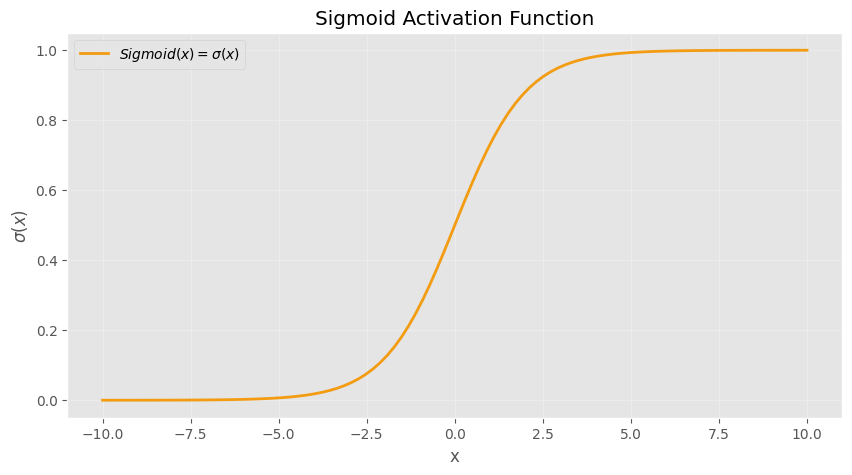

In [13]:
x_vals = np.linspace(-10, 10, 100)
X = tensor(x_vals, requires_grad=True)
sigmoid = Sigmoid()
Y = sigmoid(X)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, Y.numpy(), label='$Sigmoid(x) = \\sigma(x)$', color='#f39c12', lw=2)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("$\\sigma(x)$")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Handling Extreme Values

In [12]:
# Demonstrating stability with large values
X_ext = tensor([-100.0, 0.0, 100.0], requires_grad=True)
Y_ext = sigmoid(X_ext)
Y_ext.backward()

print(f"Logits:    {X_ext.numpy()}")
print(f"Probs:     {Y_ext.numpy()} (No NaNs!)")
print(f"Gradients: {X_ext.grad}")

Logits:    [-100.    0.  100.]
Probs:     [3.8e-44 5.0e-01 1.0e+00] (No NaNs!)
Gradients: [3.8e-44 2.5e-01 0.0e+00]
